# AUEB M.Sc. in Data Science (part-time)

**Course**: Machine Learning and Computational Statistics

**Semester**: Winter 2018

**8th homework**

**Author**: Spiros Politis

---

Imports and globals:

In [1]:
import numpy as np

import pandas as pd

import scipy.io as sio
from scipy.stats import *

from sklearn import *
from sklearn.datasets import *
from sklearn.preprocessing import *
from sklearn.mixture import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import *

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm

from cycler import cycler

import seaborn as sns

In [2]:
# Aesthetics for plots
plt.style.use("ggplot")

plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

---

## Exercise 1

We start with the negative log-likelihood function of the logistic regression classifier:
    
$$L(\boldsymbol{\theta}) = -\sum_{n=1}^{N} \left( y_{n} ln(s_{n}) + (1 - y_{n}) ln(1 - s_{n}) \right) \textbf{ (1)}$$

where 

$$s_{n} = \sigma(\boldsymbol{\theta}^{T}\boldsymbol{x})$$

Taking the gradient of $\textbf{(1)}$ we get:

$$\nabla L(\boldsymbol{\theta}) = -\sum_{n=1}^{N} \left( \frac{y_{n}}{s_{n}} \frac{\partial s_{n}}{\partial \boldsymbol{\theta}} - \frac{1-y_{n}}{1-s_{n}} \frac{\partial s_{n}}{\partial \boldsymbol{\theta}} \right) \textbf{ (2)}$$

Because

$$
\frac{\partial s_{n}}{\partial \boldsymbol{\theta}} =
\frac{\partial \sigma(\boldsymbol{\theta}^{T} \boldsymbol{x})}{\partial \boldsymbol{\theta}} = 
\boldsymbol{x} \sigma(\boldsymbol{\theta}^{T}\boldsymbol{x})(1 - \sigma(\boldsymbol{\theta}^{T}\boldsymbol{x})) =
s_{n}(1 - s_{n}) \boldsymbol{x}
$$

$\textbf{(2)}$ becomes:

$$
-\sum_{n=1}^{N} \left( \frac{y_{n}}{s_{n}} s_{n}(1 - s_{n}) \boldsymbol{x}_{n} - \frac{1-y_{n}}{1-s_{n}} s_{n}(1 - s_{n}) \boldsymbol{x}_{n} \right) =
$$

$$
-\sum_{n=1}^{N} \left( y_{n} (1 - s_{n}) \boldsymbol{x}_{n} - (1-y_{n}) s_{n} \boldsymbol{x}_{n} \right) =
$$

$$
-\sum_{n=1}^{N} \boldsymbol{x}_{n} \left( y_{n} (1 - s_{n}) - (1-y_{n}) s_{n} \right) =
$$

$$
-\sum_{n=1}^{N} \boldsymbol{x}_{n} \left( y_{n} - y_{n}s_{n} - s_{n} + s_{n}y_{n} \right) =
$$

$$
\sum_{n=1}^{N} \boldsymbol{x}_{n} \left( s_{n} - y_{n} \right) =
$$

$$
X^{T}(\boldsymbol{s} - \boldsymbol{y}) \textbf{ (3)}
$$

where $X^{T} = [x_{1}, \dots, x_{N}]$, $s =[s_{1}, \dots, s_{N}]^{T}$ , $y = [y_{1}, \dots, y_{N}]^{T}$.

Having computed the gradient of the cost function, we can now formulate the gradient descent algorithm for converging to a global optimum (because the function is convex) of this cost function and achieve its minimization.

(a) Initialize $\boldsymbol{\theta}$ randomly

(b) Set $i = 0$

(c) Do one step of the algorithm:

One step of the gradient descent algorithm (an update) is formalised as:

$$
\boldsymbol{θ}^{(i)} = \boldsymbol{θ}^{(i-1)} - \mu \nabla L(\boldsymbol{\theta}) |_{\boldsymbol{θ}=\boldsymbol{θ}^(i-1)}  =  \boldsymbol{θ}^{(i-1)} - \mu X^{T} (s^{i-1} - y)
$$

(d) Repeat until convergence

---

## Exercise 2

Setting setting $x_{i} = [1 x_{i}']^{Τ}$, $i = 1, \dots, N$, and $\boldsymbol{\theta} = [\theta_{0} \boldsymbol{\theta}]^{T}$ we get  a more compact representation of the model, $y = f(\theta^{T}\boldsymbol{x})$.

### Answer (a)

Defining the function $f(z) = \frac{1}{1 + e^{-az}}$:

In [3]:
def f(a, z):
    return 1 / (1 + np.exp(- a * z))

Plotting the function for various values of the parameter $\alpha$:

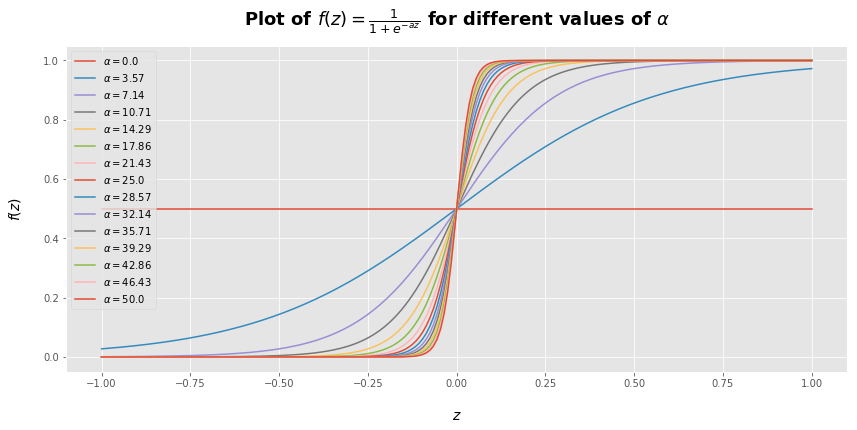

In [4]:
# Plot
fig, ax = plt.subplots(figsize = (14, 6))

a = np.linspace(1, 1, 200).reshape(200, 1)
z = np.linspace(-1, 1, 200).reshape(200, 1)

for i in np.linspace(0, 50, 15):
    i = np.round(i, 2)
    ax.plot(z, f(a * i, z), "-", label = r"$\alpha = $" + str(i))

# Set graph title
ax.set_title(r"Plot of $f(z) = \frac{1}{1 + e^{-az}}$ for different values of $\alpha$", fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$z$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$f(z)$", fontdict = plot_axis_title_font, labelpad = 20)

# Legend
plt.legend()

pass;

---

### Answer (b)

First step would be to define the cost function that we aim to minimize, $J(\boldsymbol{\theta})$ as:

$$J(\boldsymbol{\theta}) = \sum_{i=1}^{N} (y_{i} - f(\boldsymbol{\theta}^{T}x_{i}))^{2}$$

Next, we would compute the grafient of $J(\boldsymbol{\theta})$, which involves taking the derivative w.r.t $\theta$ of $J(\boldsymbol{\theta})$:

$$
\frac{\partial J(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} =
$$

$$
-2 \sum_{i=1}^{N} \left[ \left( y_{i} - f(\boldsymbol{\theta}^{T}x_{i}) \right) \left( \frac{\partial f(\boldsymbol{\theta}^{T}x_{i})}{\partial \boldsymbol{\theta}} \right) \right] =
$$

$$
-2 \sum_{i=1}^{N} \left[ \left( y_{i} - f(\boldsymbol{\theta}^{T}x_{i}) \right) x_{i} \left( f(\boldsymbol{\theta}^{T}x_{i}) \right) \left(1 - f(\boldsymbol{\theta}^{T}x_{i}) \right) \right]
\textbf{ (1)}
$$

One step of the gradient descent algorithm involves calculating the following expression:
    
$$
\theta_{i-1} = \theta_{i} - \left. \mu \frac{\partial J(\theta)}{\partial \theta} \right|_{\theta = \theta_{i} - 1}
\textbf{ (2)}
$$

where $\mu$ is the learning rate.

Substituting $\textbf{(1)}$ into $\textbf{(2)}$ we get:

$$
\theta_{i-1} = \theta_{i} + 2 \mu \sum_{i=1}^{N} \left[ \left( y_{i} - f(\boldsymbol{\theta}^{T}x_{i}) \right) x_{i} \left( f(\boldsymbol{\theta}^{T}x_{i}) \right) \left(1 - f(\boldsymbol{\theta}^{T}x_{i}) \right) \right]
$$

---

### Answer (c)

The model is utilising the sigmoid function in order to classify a given $x_{i}$. The function tends to either $0$ or $1$, depending on the value of the denominator of the function. If the value of $z \rightarrow +\infty$ then $y \rightarrow 0$ and if $z \rightarrow -\infty$, $y \rightarrow 1$. In either case, the function will never have a value that is a clear $0$ or $1$.

---

### Answer (d)

The model responds with the probability of $x_{i}$ belonging to either class $0$ or class $1$. The decision is given by $f(\theta^{T}\boldsymbol{x})$. If the output of the function is $y \lt 0.5$, the model classifies the observation to class $0$, otherwise to class $1$.

---

### Answer (e)

Looking at the graph produced in answer (a), we observe that the larger the value of $\alpha$ becomes, the steeper the sigmoid function becomes. Hence, increasing $\alpha$ is the way for leading the model responses very close to $1$ (for class $1$ vectors) or $0$ (for class $0$ vectors).

---

## Exercise 3

Loading the data set and defining the $X$ and $y$ sets:

In [5]:
Dataset = sio.loadmat("HW8.mat")
train_x = Dataset["train_x"]
train_y= Dataset["train_y"]

test_x = Dataset["test_x"]
test_y = Dataset["test_y"]

In [6]:
'''
    Returns features x_{i} for a specific class
    
    :param X: NxM Numpy matrix (N observations, M features)
    :param y: Nx1 Numpy matrix
    :param label: The class label of interest
    
    :returns: 
'''
def get_x_for_label_y(X, y, label):
    return X[np.argwhere(y == label)[:, 0], :]



'''
    Returns features x_{i} for a specific class
    
    :param X: NxM Numpy matrix (N observations, M features)
    :param y: Nx1 Numpy matrix
    :param label: The class label of interest
    
    :returns: 
'''
def score(y_pred, y_test):
    N = y_test.shape[0]
    
    accuracy = np.count_nonzero(y_pred == y_test) / N
    error = 1 - accuracy
    
    return (accuracy, error)

In [7]:
# Observations for class 1
x_class_1 = get_x_for_label_y(train_x, train_y, 1)

# Observations for class 2
x_class_2 = get_x_for_label_y(train_x, train_y, 2)

# Features x1, x2 for class 1
x_1_class_1 = get_x_for_label_y(train_x, train_y, 1)[:, 0]
x_2_class_1 = get_x_for_label_y(train_x, train_y, 1)[:, 1]

# Features x1, x2 for class 2
x_1_class_2 = get_x_for_label_y(train_x, train_y, 2)[:, 0]
x_2_class_2 = get_x_for_label_y(train_x, train_y, 2)[:, 1]

# Number of observations in the training set
N = train_x.shape[0]

# Number of observations for class 1
N_1 = x_class_1.shape[0]

# Number of observations for class 2
N_2 = x_class_2.shape[0]

### Answer (a): Adoption of the **Bayes classifier**

#### Answer (i)

Computing prior probabilities $P(\omega_{1})$, $P(\omega_{2})$:

In [8]:
# Priors
p_omega_1 = N_1 / N
p_omega_2 = N_2 / N

priors_df = pd.DataFrame([
    ["$\omega_{1}$", p_omega_1],
    ["$\omega_{2}$", p_omega_2],
], columns = ["Class", "Prior ($P(\omega_{i})$)"])
priors_df

,Class,Prior ($P(\omega_{i})$)
0,$\omega_{1}$,0.5
1,$\omega_{2}$,0.5


Estimating the parameters $\boldsymbol{\mu}$ and $\Sigma$ of the multivariate normal parametric model.

The well-known ML estimators for the parameters are the mean vector and the biased covariance matrix, given by:

$$\boldsymbol{\mu} = \frac{1}{N} \sum_{i=1}^{N} x_{i}$$

$$\Sigma = \frac{1}{N} \sum_{i=1}^{N} (X_{i}- \boldsymbol{\mu})(X_{i} - \boldsymbol{\mu})^{T}$$

where $N$ is the number of observations.

In [9]:
# Parameters for the multivariate normal distribution of class 1
omega_1_mu = np.mean(x_class_1, axis = 0)
omega_1_sigma = np.cov(x_class_1.T, bias = True)

# Parameters for the multivariate normal distribution of class 2
omega_2_mu = np.mean(x_class_2, axis = 0)
omega_2_sigma = np.cov(x_class_2.T, bias = True)

parameters_df = pd.DataFrame([
    [1, omega_1_mu, omega_1_sigma],
    [2, omega_2_mu, omega_2_sigma],
], columns = ["Class", "$\mu$", "$\Sigma$"])
parameters_df

,Class,$\mu$,$\Sigma$
0,1,"[0.14549472062757257, 0.11840199475343567]","[[3.6009964394170435, 1.723867368611926], [1.7..."
1,2,"[2.070243392875879, -1.8913652876020368]","[[4.670597106503914, 2.5746833953532793], [2.5..."


Obtaining the parametric models for each $P(x|\omega_{1})$, $P(x|\omega_{2})$:

In [10]:
# Multivariate normal of class 1
omega_1_pdf = multivariate_normal(mean = omega_1_mu, cov = omega_1_sigma)

# Multivariate normal of class 2
omega_2_pdf = multivariate_normal(mean = omega_2_mu, cov = omega_2_sigma)

#### Answer (ii)

Obtaining probabilities from each parametric model:

In [11]:
# Placeholder for posterior probabilities
posteriors = np.zeros((test_x.shape[0], 2))

# Computing probiabilities for each class
p_x_g_omega_1 = omega_1_pdf.pdf(test_x)
p_x_g_omega_2 = omega_2_pdf.pdf(test_x)

# Posterior probability is computed as the prior * likelihood
posteriors[:, 0] = p_omega_1 * p_x_g_omega_1
posteriors[:, 1] = p_omega_2 * p_x_g_omega_2

posteriors_df = pd.DataFrame(
    data = posteriors,
    columns = ["$P(x|\omega_{1})$", "$P(x|\omega_{2})$"]
)

posteriors_df.head(5)

,$P(x|\omega_{1})$,$P(x|\omega_{2})$
0,0.008252,0.003843
1,0.001491,0.019357
2,0.008799,0.000905
3,0.021511,0.005249
4,0.011370,0.000102


#### Answer (iii)

Computing Btest_y, containing the estimated class labels ($1$ or $2$), and scoring the classifier:

In [12]:
# Assigning class label according to posterior probability
# If P(x|omega_1) >= P(x|omega_2), set to class 1, otherwise 2
NBtest_y = np.where(posteriors[:, 0].reshape(N, 1) >= posteriors[:, 1].reshape(N, 1), 1, 2)

bayes_accuracy, bayes_error = score(NBtest_y, test_y)

naive_bayes_classification_metrics_df = pd.DataFrame([
    [bayes_accuracy, bayes_error]
], columns = ["Accuracy (%)", "Error (%)"])
naive_bayes_classification_metrics_df

,Accuracy (%),Error (%)
0,0.85,0.15


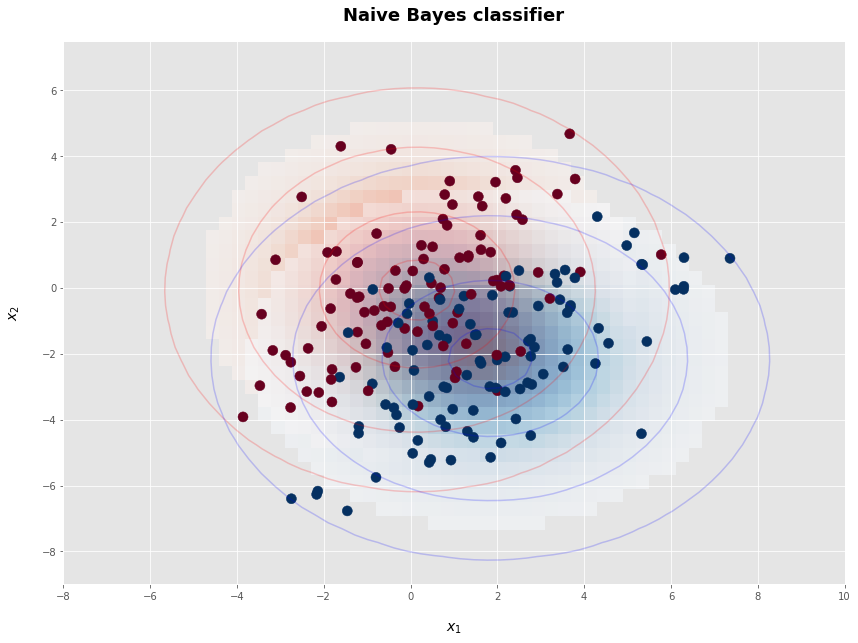

In [43]:
# Plot
fig, ax = plt.subplots(figsize = (14, 10))

xlim = (-8, 10)
ylim = (-9, 7.5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
grid = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot test data points
ax.scatter(test_x[:, 0], test_x[:, 1], c = test_y[:, 0], s = 100, cmap = "RdBu")

ax.set(xlim = xlim, ylim = ylim)

for label, color in enumerate(["red", "blue"]):
    mask = (test_y[:, 0] == label + 1)
    mu, std = test_x[mask].mean(0), test_x[mask].std(0)
    p = np.exp(-0.5 * (grid - mu) ** 2 / std ** 2).prod(1)
    pm = np.ma.masked_array(p, p < 0.03)
    ax.pcolorfast(xg, yg, pm.reshape(xx.shape), alpha = 0.5, cmap = color.title() + "s")
    ax.contour(xx, yy, p.reshape(xx.shape), levels = [0.01, 0.1, 0.5, 0.9], colors = color, alpha = 0.2)
    
# Set graph title
ax.set_title("Naive Bayes classifier", fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)

pass;

---

### Answer (b)

The classifier is designed by implementing the following steps:

- Adopt a pdf model for each $\omega_{j}$, $P(x|\omega_{j} ; \theta) = \prod_{k=1}^{l} P_{k}(x_{k}|\omega_{j} ; \theta_{jk})$ parameterized by $\theta_{j}$.

- Apply the Maximum Likelihood (or any other relevant) method $M * l$ times ($l$ times for each class) for the estimation of $\theta_{jk}$'s of the one-dimensional $P(x_{k}|\omega_{j})$’s, based on the corresponding $Y_{jk}$.

- Estimate $P(\omega_{j})$'s as follows: $P(\omega_{j}) \approx N_{i} / N$.

- Define $g_{j}(x) = P(\omega_{j})P(x|\omega_{j}) = \prod_{k=1}^{l} P_{k}(x_{k}|\omega_{j})$.

Then, for a given $x$:

- Compute the values of $g_{j}(x)$, $j = 1, \dots, M$.

- Assign $x$ to class $k$ with $g_{k}(x) = max_{j = 1, \dots, M} g_{j}(x)$.

#### Answer (i)

Computing prior probabilities $P(\omega_{1})$, $P(\omega_{2})$:

In [14]:
# Priors
p_omega_1 = N_1 / N
p_omega_2 = N_2 / N

priors_df = pd.DataFrame([
    ["$\omega_{1}$", p_omega_1],
    ["$\omega_{2}$", p_omega_2],
], columns = ["Class", "Prior ($P(\omega_{i})$)"])
priors_df

,Class,Prior ($P(\omega_{i})$)
0,$\omega_{1}$,0.5
1,$\omega_{2}$,0.5


Computing ML estimates for the parameters $\mu$ and $\sigma^{2}$ of each univariate normal distribution of $x_{1}$ and $x_{2}$.

The well-known ML estimators for the parameters are the sample mean and sample variance, given by:

$$\mu = \frac{1}{N} \sum_{i=1}^{N} x_{i}$$

$$\sigma^{2} = \frac{1}{N} \sum_{i=1}^{N} (x_{i} - \mu)^{2} $$

where $N$ is the number of observations.

In [15]:
# Parameters for the distribution of feature 1 of class 1
omega_1_mu_1 = np.sum(x_1_class_1) / len(x_1_class_1)
omega_1_sigma_1 = np.sum(np.power(omega_1_mu_1 - x_1_class_1, 2)) / len(x_1_class_1)

# Parameters for the distribution of feature 2 of class 1
omega_1_mu_2 = np.sum(x_2_class_1) / len(x_2_class_1)
omega_1_sigma_2 = np.sum(np.power(omega_1_mu_2 - x_2_class_1, 2)) / len(x_2_class_1)

# Parameters for the distribution of feature 1 of class 2
omega_2_mu_1 = np.sum(x_1_class_2) / len(x_1_class_2)
omega_2_sigma_1 = np.sum(np.power(omega_2_mu_1 - x_1_class_2, 2)) / len(x_1_class_2)

# Parameters for the distribution of feature 2 of class 2
omega_2_mu_2 = np.sum(x_2_class_2) / len(x_2_class_2)
omega_2_sigma_2 = np.sum(np.power(omega_2_mu_2 - x_2_class_2, 2)) / len(x_2_class_2)



# Sanity check against default Numpy packages
assert omega_1_mu_1 == np.mean(x_1_class_1)
assert omega_1_sigma_1 == np.var(x_1_class_1)

assert omega_1_mu_2 == np.mean(x_2_class_1)
assert omega_1_sigma_2 == np.var(x_2_class_1)

assert omega_2_mu_1 == np.mean(x_1_class_2)
assert omega_2_sigma_1 == np.var(x_1_class_2)

assert omega_2_mu_2 == np.mean(x_2_class_2)
assert omega_2_sigma_2 == np.var(x_2_class_2)



parameters_df = pd.DataFrame([
    [1, 1, omega_1_mu_1, omega_1_sigma_1],
    [1, 2, omega_1_mu_2, omega_1_sigma_2],
    [2, 1, omega_2_mu_1, omega_2_sigma_1],
    [2, 2, omega_2_mu_2, omega_2_sigma_2],
], columns = ["Class", "$x_{i}$", "$\mu_{i}$", "$\sigma_{i}^{2}$"])
parameters_df

,Class,$x_{i}$,$\mu_{i}$,$\sigma_{i}^{2}$
0,1,1,0.145495,3.600996
1,1,2,0.118402,4.178362
2,2,1,2.070243,4.670597
3,2,2,-1.891365,4.333863


Obtain the parametric models for each $P(x_{i}|\omega_{j})$:

In [16]:
# Conditional PDF of x_1 given omega_1
x_1_g_omega_1_pdf = norm(loc = omega_1_mu_1, scale = np.sqrt(omega_1_sigma_1))
# Conditional PDF of x_2 given omega_1
x_2_g_omega_1_pdf = norm(loc = omega_1_mu_2, scale = np.sqrt(omega_1_sigma_2))

# Conditional PDF of x_1 given omega_2
x_1_g_omega_2_pdf = norm(loc = omega_2_mu_1, scale = np.sqrt(omega_2_sigma_1))
# Conditional PDF of x_2 given omega_2
x_2_g_omega_2_pdf = norm(loc = omega_2_mu_2, scale = np.sqrt(omega_2_sigma_2))

#### Answer (ii)

Computing posterior probabilities:

In [17]:
# Placeholder for posterior probabilities
posteriors = np.zeros((test_x.shape[0], 2))

# Computing probiabilities for each class
p_x_g_omega_1 = np.multiply(p_omega_1, np.multiply(x_1_g_omega_1_pdf.pdf(test_x[:, 0]), x_2_g_omega_1_pdf.pdf(test_x[:, 1])))
p_x_g_omega_2 = np.multiply(p_omega_2, np.multiply(x_1_g_omega_2_pdf.pdf(test_x[:, 0]), x_2_g_omega_2_pdf.pdf(test_x[:, 1])))

posteriors[:, 0] = p_omega_1 * p_x_g_omega_1
posteriors[:, 1] = p_omega_2 * p_x_g_omega_2

posteriors_df = pd.DataFrame(
    data = posteriors,
    columns = ["$P(x|\omega_{1})$", "$P(x|\omega_{2})$"]
)

posteriors_df.head(5)

,$P(x|\omega_{1})$,$P(x|\omega_{2})$
0,0.002542,0.001887
1,0.002216,0.008358
2,0.002717,0.001082
3,0.009824,0.004766
4,0.006880,0.000872


#### Answer (iii)

In [18]:
# Assigning class label according to posterior probability
# If P(x|omega_1) >= P(x|omega_2), set to class 1, otherwise 2
NBtest_y = np.where(posteriors[:, 0].reshape(N, 1) >= posteriors[:, 1].reshape(N, 1), 1, 2)

naive_bayes_accuracy, naive_bayes_error = score(NBtest_y, test_y)

naive_bayes_classification_metrics_df = pd.DataFrame([
    [naive_bayes_accuracy, naive_bayes_error]
], columns = ["Accuracy (%)", "Error (%)"])
naive_bayes_classification_metrics_df

,Accuracy (%),Error (%)
0,0.835,0.165


#### <font color="red">Alternative implementation</font>

The above solution does not scale well for many features. Here is a more generic implementation of the Naive Bayes classifier.

In [19]:
'''
    Returns features x_{i} for a specific class
    
    :param X: NxM Numpy matrix (N observations, M features)
    :param y: Nx1 Numpy matrix
    :param label: The class label of interest
    
    :returns: 
'''
def get_x_for_label_y(x, y, label):
    return x[np.argwhere(y == label)[:, 0], :]



'''
    Parameterizes the Naive Bayes model
    
    :param X: NxM Numpy matrix (N observations, M features)
    :param y: Nx1 Numpy matrix
    :param labels: Nx1 Numpy matrix
    
    :returns: Nx1 Numpy matrix of prior probabilities, MxN matrix of frozen univariate normal objects
'''
def compute_parameters_naive_bayes(X, y, labels):
    N = X.shape[0]
    N_features = X.shape[1]
    N_labels = labels.shape[0]
    
    ###
    # Compute class indexes
    ##
    label_indexes = (y == labels)
    
    ###
    # Compute priors
    ##
    priors = np.empty((N_labels, 1))
    for i in range(0, N_labels):
        priors[i, 0] = get_x_for_label_y(X, y, labels[i]).shape[0] / N
    
    ###
    # Compute ML estimates for parameters
    ##
    mu = np.empty((N_labels, N_features))
    sigma = np.empty((N_labels, N_features))
    
    # For each class
    for i in range(0, N_labels):
        xi = get_x_for_label_y(X, y, labels[i])
        
        # For each feature xi
        for j in range(0, xi.shape[1]):
            mu[i, j] = np.mean(xi[:, j])
            sigma[i, j] = np.var(xi[:, j])
    
    ###
    # Compute frozen conditional PDFs
    ##
    pdfs = np.empty((N_labels, N_features), dtype = object)
    for i in range(0, N_labels):
        for j in range(0, N_features):
            pdfs[i, j] = norm(loc = mu[i, j], scale = np.sqrt(sigma[i, j]))
    
    return priors, pdfs



'''
    Computes posterior probabilities of the Naive Bayes model
    
    :param X_test: NxM Numpy matrix (N observations, M features)
    :param y_test: Nx1 Numpy matrix
    :param labels: Nx1 Numpy matrix of class labels
    :param priors: Nx1 Numpy matrix of prior probabilities
    :param pdfs: MxN Numpy matrix of frozen univariate normal PDF objects
    
    :returns: MxN Numpy matrix of posterior probabilities
'''
def compute_posteriors_naive_bayes(X_test, y_test, labels, priors, pdfs):
    N = X_test.shape[0]
    N_features = X_test.shape[1]
    N_labels = labels.shape[0]
    
    ###
    # Compute posteriors
    ##
    posteriors = np.empty((N, N_labels))
    for i in range(0, N_labels):
        post = np.ones(N)
        for j in range(0, N_features):
            post = np.multiply(post, pdfs[i, j].pdf(X_test[:, j]))
        
        post = np.multiply(priors[i], post)
        
        posteriors[:, i] = post
    
    return posteriors




'''
    Computes posterior probabilities of the Naive Bayes model
    
    :param posteriors: MxN Numpy matrix of posterior probabilities
    :param labels: Nx1 Numpy matrix of class labels
    
    :returns: Nx1 Numpy matrix of class labels
'''
def classify_naive_bayes(posteriors, labels):
    return labels[np.argmax(posteriors, axis = 1).reshape(N, 1)]
    


'''
    Scores the Naive Bayes model

    :param y_pred: Nx1 Numpy matrix of predicted classes
    :param y_test: Nx1 Numpy matrix of actual classes

    :returns: accuracy and error percentages
'''
def score_naive_bayes(y_pred, y_test):
    N = y_test.shape[0]
    
    accuracy = np.count_nonzero(y_pred == y_test) / N
    error = 1 - accuracy
    
    return (accuracy, error)

In [20]:
# Define class labels
labels = np.array([1, 2]).T

In [21]:
# Compute priors and the PDFs
priors, pdfs = compute_parameters_naive_bayes(train_x, train_y, labels)

In [22]:
# Compute posteriors
posteriors = compute_posteriors_naive_bayes(test_x, test_y, labels, priors, pdfs)

In [23]:
# Compute predictions
y_pred = classify_naive_bayes(posteriors, labels)

In [24]:
# Compute classifier score
naive_bayes_accuracy, naive_bayes_error = score_naive_bayes(y_pred, test_y)

naive_bayes_classification_metrics_df = pd.DataFrame([
    [naive_bayes_accuracy, naive_bayes_error]
], columns = ["Accuracy (%)", "Error (%)"])
naive_bayes_classification_metrics_df

,Accuracy (%),Error (%)
0,0.835,0.165


---

### Answer (c): Adoption of the **k-nearest neighbor classifier**, for k = 5

We shall fit a k-NN classifier, for number of neighbors parameter $k = 5$ ,as implemented in SciKit Learn:

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
knn_clf_fitted = knn_clf.fit(train_x, train_y.reshape(N))

In [26]:
NBtest_y = knn_clf_fitted.predict(test_x).reshape(N, 1)

In [27]:
knn_accuracy, knn_error = score(NBtest_y, test_y)

knn_classification_metrics_df = pd.DataFrame([
    [knn_accuracy, knn_error]
], columns = ["Accuracy (%)", "Error (%)"])
knn_classification_metrics_df

,Accuracy (%),Error (%)
0,0.83,0.17


Plotting the classifier  decision boundary along with the test set data points:

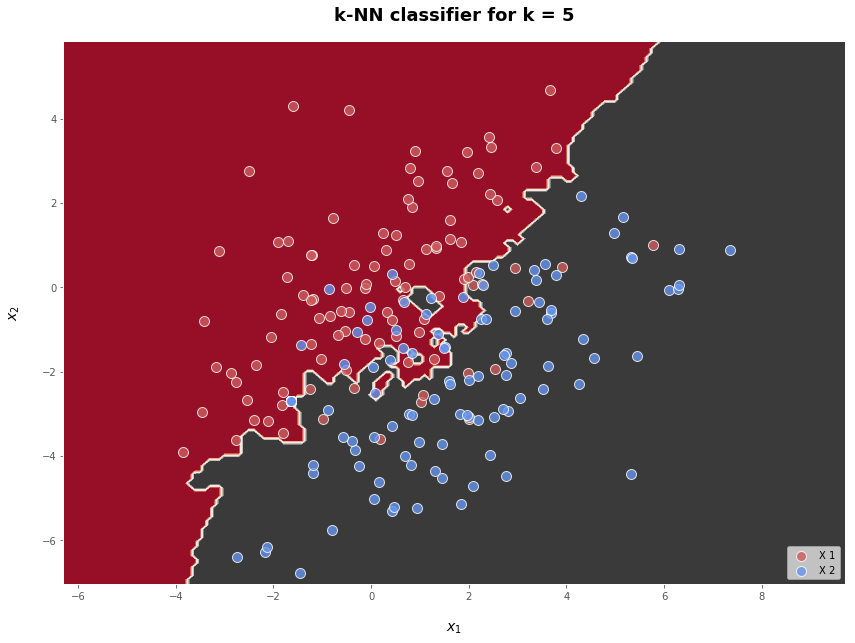

In [28]:
# Plot
fig, ax = plt.subplots(figsize = (14, 10))

padding = 0.1
resolution = 0.1

# Class colors
class_colors = {
    1: "indianred", 
    2: "cornflowerblue"
}

# Set range values for the graph
x_min, x_max = train_x[:, 0].min(), train_x[:, 0].max()
y_min, y_max = train_x[:, 1].min(), train_x[:, 1].max()

x_range = x_max - x_min
y_range = y_max - y_min

x_min -= x_range * padding
y_min -= y_range * padding

x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

z = knn_clf_fitted.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# Plot the contour map
ax.contourf(xx, yy, z, cmap = "RdGy")

# Plot test points
for label in np.unique(test_y):
    indices = np.where(test_y == label)
    plt.scatter(test_x[indices, 0], test_x[indices, 1], c = class_colors[label], s = 100, alpha = 0.8, edgecolor = "white", linewidth = 1, label = 'X {}'.format(label))
    
# Set graph title
ax.set_title("k-NN classifier for k = {}".format(knn_clf.get_params()["n_neighbors"]), fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)

ax.legend(loc = "lower right")

pass;

---

### Answer (d): Adoption the **logistic regression classifier**

We shall fit a LogisticRegression classifier, as implemented in SciKit Learn:

In [29]:
from sklearn.linear_model import *

In [30]:
log_reg_clf = LogisticRegression(C = 1e5, solver = "lbfgs", multi_class = "multinomial", random_state = 19730618, verbose = 0)
log_reg_clf_fitted = log_reg_clf.fit(train_x, train_y.reshape(N))

In [31]:
NBtest_y = log_reg_clf_fitted.predict(test_x).reshape(N, 1)

In [32]:
log_reg_accuracy, log_reg_error = score(NBtest_y, test_y)

log_reg_classification_metrics_df = pd.DataFrame([
    [log_reg_accuracy, log_reg_error]
], columns = ["Accuracy (%)", "Error (%)"])
log_reg_classification_metrics_df

,Accuracy (%),Error (%)
0,0.845,0.155


The logistic regression classifier can also report on the probability $P(y = 1 | x)$ of each observation in the test set, making plotting of the classifier desicion boundaries very informative:

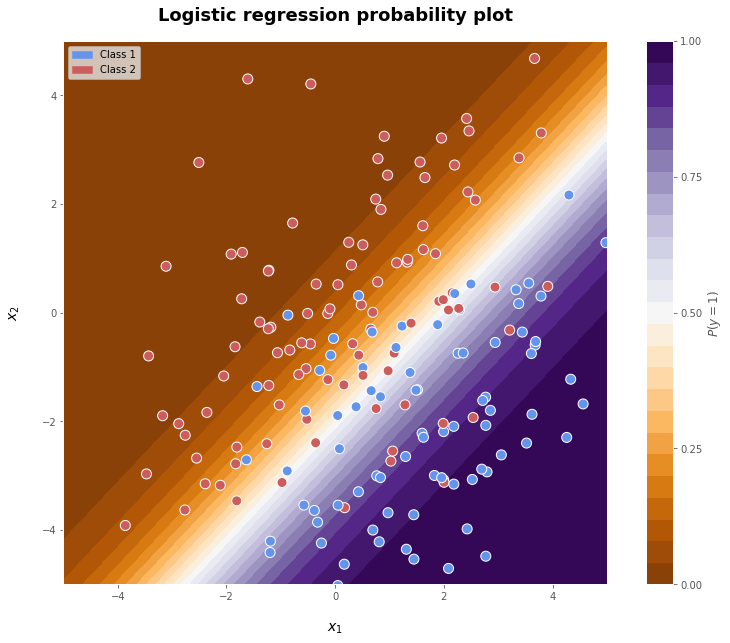

In [33]:
# Plot
fig, ax = plt.subplots(figsize = (14, 10))

# Class colors
class_colors = {
    1: "indianred", 
    2: "cornflowerblue"
}

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
z = np.c_[xx.ravel(), yy.ravel()]

# Get probabilities of belonging to each class from the fitted model
predicted_probabilities = log_reg_clf_fitted.predict_proba(z)[:, 1].reshape(xx.shape)

# Plot probability contours
contour = ax.contourf(xx, yy, predicted_probabilities, 25, cmap = "PuOr", vmin = 0, vmax = 1)

# Plot test points
ax.scatter(test_x[:,0], test_x[:, 1], c = [class_colors[c] for c in test_y[:, 0]], s = 100, vmin = -0.2, vmax = 1.2, edgecolor = "white", linewidth = 1)
ax.set(aspect = "equal", xlim = (-5, 5), ylim = (-5, 5))

# Set graph title
ax.set_title("Logistic regression probability plot", fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)

# Set plot legend
label_x_class_1 = patches.Patch(color = "cornflowerblue", label = "Class 1")
label_x_class_2 = patches.Patch(color = "indianred", label = "Class 2")
ax.legend(handles = [label_x_class_1, label_x_class_2])

# Probabilities colorbar axis
ax_l = plt.colorbar(contour)
ax_l.set_label("$P(y = 1)$")
ax_l.set_ticks([0, .25, .5, .75, 1])

pass;

---

### Answer (e): Depicting graphically the training set, using different colors for points from different classes

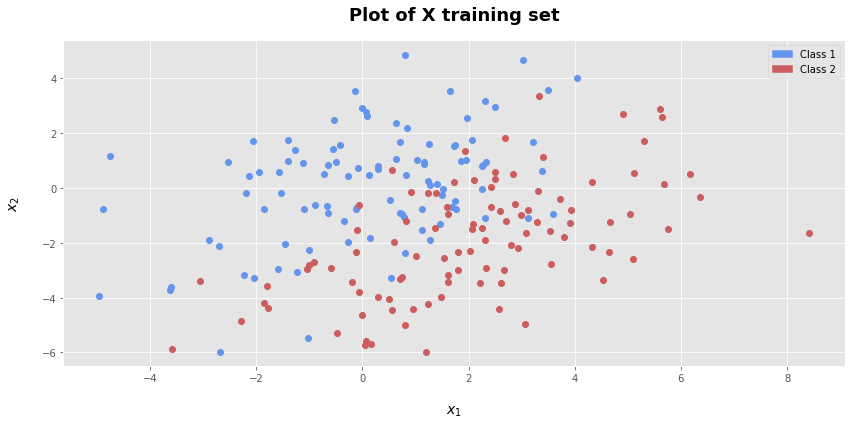

In [34]:
# Plot
fig, ax = plt.subplots(figsize = (14, 6))

# Plot class 1
ax.plot(x_1_class_1, x_2_class_1, "o", color = "cornflowerblue", label = "Class 1")

# Plot class 2
ax.plot(x_1_class_2, x_2_class_2, "o", color = "indianred", label = "Class 2")

# Set graph title
ax.set_title(r"Plot of X training set", fontdict = plot_main_title_font, pad = 20)

# Set graph axis labels
ax.set_xlabel(r"$x_{1}$", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(r"$x_{2}$", fontdict = plot_axis_title_font, labelpad = 20)

# Set plot legend
label_x_class_1 = patches.Patch(color = "cornflowerblue", label = "Class 1")
label_x_class_2 = patches.Patch(color = "indianred", label = "Class 2")
ax.legend(handles = [label_x_class_1, label_x_class_2])

pass;

---

### Answer (f): Reporting on the classification results obtained by the four classifiers and commenting on them

The final report on classification results is provided below:

In [35]:
classification_metrics_df = pd.DataFrame([
    ["Bayes", bayes_accuracy, bayes_error],
    ["Naive Bayes", naive_bayes_accuracy, naive_bayes_error],
    ["k-NN", knn_accuracy, knn_error],
    ["Logistic Regression", log_reg_accuracy, log_reg_error]
], columns = ["Classifier", "Accuracy (%)", "Error (%)"])
classification_metrics_df

,Classifier,Accuracy (%),Error (%)
0,Bayes,0.850,0.150
1,Naive Bayes,0.835,0.165
2,k-NN,0.830,0.170
3,Logistic Regression,0.845,0.155


As was expected, the Bayes classifier produced the best classification results in terms of prediction error as, in theory, it is optimal. Also, having not performed statistical independence tests to validate the assumption that our classes are statistically independent, we observe that the Naive Bayes classifier makes predictions with accuracy close to the Bayes classifier. 

The same low-error results are obtained from the Logistic Regression classifier, whose requirement is that the classes are linearly seperable. We observe from the graph above that they are, for he most part.

Regarding the conditions under which the classifiers would exhibit comparable performance, we would expect that this would depend on the linear separability of classes. We would expect that the more separable the classes are, the more the accuracy of the classifiers would converge to the Bayes optimal performance.

---